In [1]:
import os, time

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import SimpleITK as sitk
import torchio

import sys
sys.path.append('../')
from datautils.visualization import NdimageVisualizer, display_image
from datautils.conversion import *

viz = NdimageVisualizer()

If you use TorchIO for your research, please cite the following paper:
Pérez-García et al., TorchIO: a Python library for efficient loading,
preprocessing, augmentation and patch-based sampling of medical images
in deep learning. Credits instructions: https://torchio.readthedocs.io/#credits



In [2]:
data_dir = "/home/chinmay/Datasets/HECKTOR/hecktor_train/crFHN_rs113_hecktor_nii"

patient_1 = "CHGJ008"
PET_sitk = sitk.ReadImage(f"{data_dir}/{patient_1}_pt.nii.gz") # Shape (W,H,D): 450x450x90 voxels
PET_np = sitk2np(PET_sitk, keep_whd_ordering=True)

print("Min and Max SUV:", PET_np.min(), PET_np.max())

Min and Max SUV: -5.0325503 71.97498


In [3]:
# Smoothing

t1 = time.time()
sigma = [2.0, 2.0, 2.0/3] # In format (W,H,D), Physical sigma of 2mm adjusted according to voxel spacing
PET_smooth_np = scipy.ndimage.gaussian_filter(PET_np, sigma=sigma)
time_diff = time.time() - t1

#print(f"Time taken for filtering: {time_diff:.2f}s")

print("Min and Max SUV:", PET_smooth_np.min(), PET_smooth_np.max())

Min and Max SUV: -0.60632825 28.235432


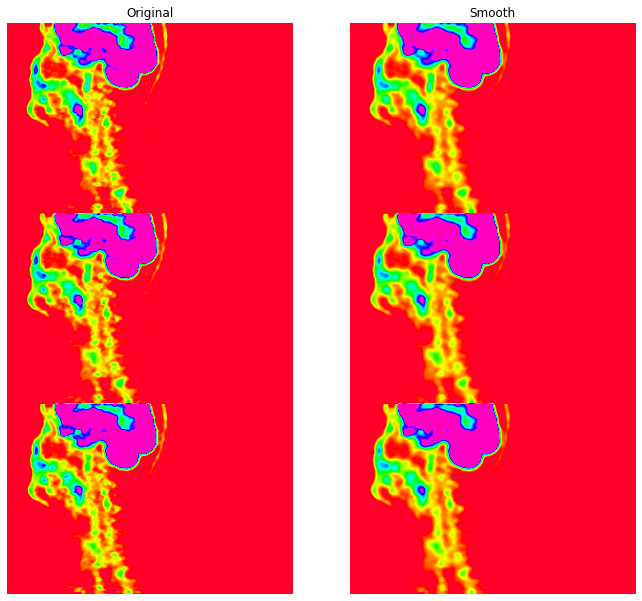

In [4]:
# Display
viz.multi_image_strips([PET_np, PET_smooth_np],
                          modalities=['PET'] * 2,
                          idx_range=[250, 253],
                          view='sagittal',
                          subtitles=["Original", "Smooth"])

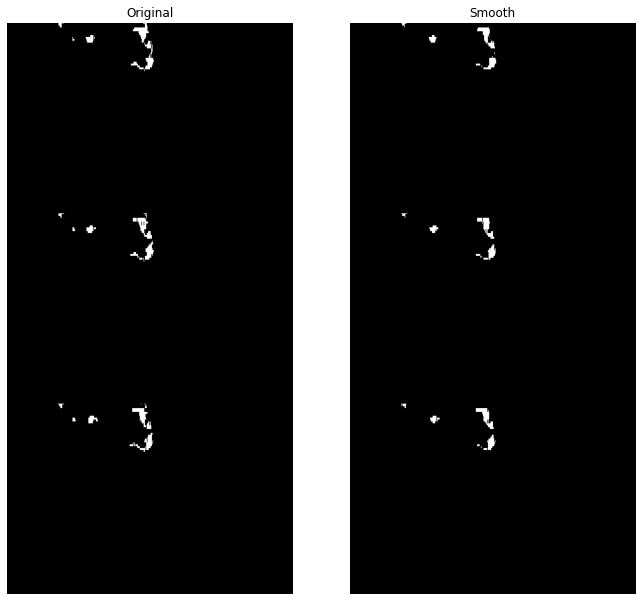

In [7]:
# Display
viz.multi_image_strips([PET_np > 10, PET_smooth_np > 10],
                          modalities=['target-labelmap'] * 2,
                          idx_range=[250, 253],
                          view='sagittal',
                          subtitles=["Original", "Smooth"])

In [10]:
print(np.argwhere(PET_np>30))

[[425 115   0]
 [425 115   2]
 [425 116   0]
 [425 116   2]
 [425 117   0]
 [425 117   2]
 [426 115   2]
 [426 116   0]
 [426 116   2]
 [426 117   2]
 [427 122   0]
 [427 122   2]
 [427 123   0]
 [427 123   2]
 [427 123   3]
 [427 124   0]
 [427 124   2]
 [428 121   0]
 [428 121   2]
 [428 122   0]
 [428 122   2]
 [428 122   3]
 [428 122   4]
 [428 122   5]
 [428 123   0]
 [428 123   1]
 [428 123   2]
 [428 123   3]
 [428 123   4]
 [428 123   5]
 [428 124   0]
 [428 124   1]
 [428 124   2]
 [428 124   3]
 [428 124   4]
 [428 124   5]
 [428 125   0]
 [428 125   2]
 [429 121   0]
 [429 121   2]
 [429 122   0]
 [429 122   1]
 [429 122   2]
 [429 122   3]
 [429 122   4]
 [429 122   5]
 [429 123   0]
 [429 123   1]
 [429 123   2]
 [429 123   3]
 [429 123   4]
 [429 123   5]
 [429 123   6]
 [429 124   0]
 [429 124   1]
 [429 124   2]
 [429 124   3]
 [429 124   4]
 [429 124   5]
 [429 125   0]
 [429 125   2]
 [429 125   3]
 [429 125   4]
 [430 121   2]
 [430 122   0]
 [430 122   2]
 [430 122 

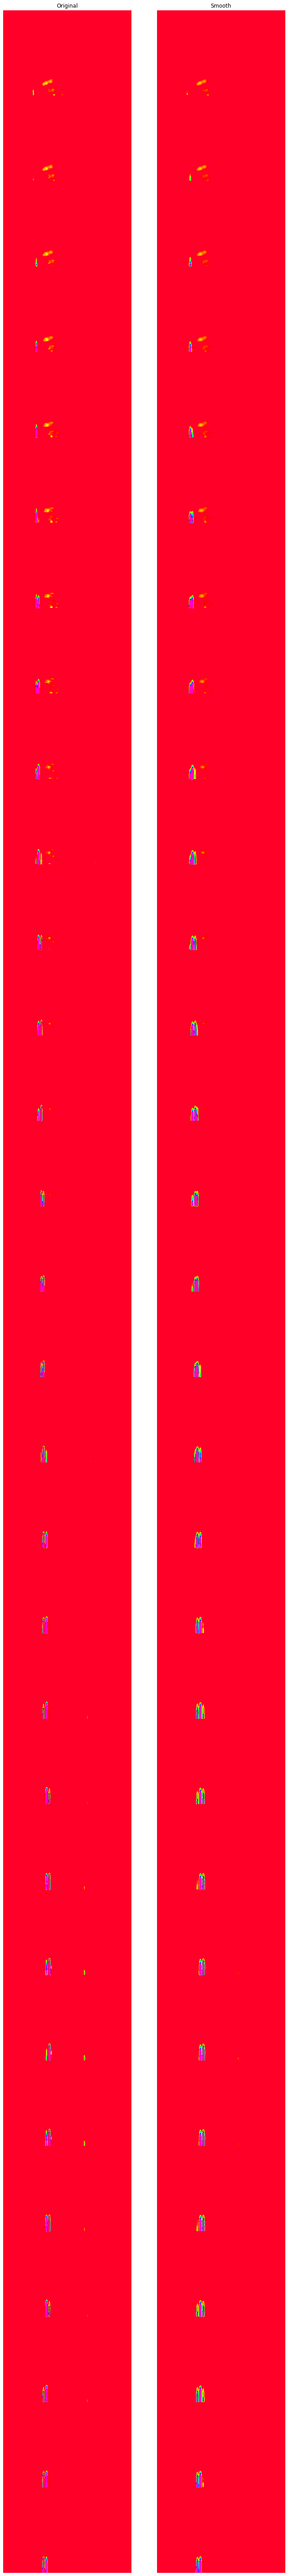

In [18]:
# Display
viz.multi_image_strips([PET_np , PET_smooth_np ],
                          modalities=['PET'] * 2,
                          idx_range=[420, 450],
                          view='sagittal',
                          subtitles=["Original", "Smooth"])